# Génération des graphiques pour la visualisation des données initiales de la CACPL



## Importation des librairies

In [1]:
import pandas as pd
import json
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

## Connexion à la BDD

In [2]:
fichierConfig = "../../bdd/config.json"

with open(fichierConfig) as fichier:
    config = json.load(fichier)["mysql"]
    
engine = create_engine('mysql+' + config["connector"] + '://' + config["user"] + ":" + config["password"] + "@" + config["host"] + ":" + config["port"] + "/" + config["bdd"], echo=True)

## Récupération et préparation des données

In [17]:
data171819 = pd.read_excel("../../data/collecte verre CACPL/Données Verre 2017-2018- 2019 janv à nov.xlsx", skiprows=[0,1], usecols="B:L")
data20 = pd.read_excel("../../data/collecte verre CACPL/Verre PAV 2020.xlsx", skiprows=[0,1,2], usecols="B:F")

data171819.drop_duplicates(inplace=True)
data20.drop_duplicates(subset=data20.columns[1:], inplace=True)

dictVilles = { "CAN": "Cannes", "CNT": "Le Cannet", "MAN": "Mandelieu-la-Napoule", "MOU": "Mougins", "THE": "Théoule-sur-Mer"}

In [18]:
dictVillesMajuscules = { "CANNES": "Cannes", "LE CANNET": "Le Cannet", "MANDELIEU-LA-NAPOULE": "Mandelieu-la-Napoule", "MOUGINS": "Mougins", "THÉOULE-SUR-MER": "Théoule-sur-Mer"}
for i in data171819.index:
    data171819.loc[i, "Ville"] = dictVillesMajuscules[data171819.loc[i, "Ville"]]
data171819

,Collecte,Contenant,Adresse,Ville,Année,MOIS,SEMAINE,date,heure,Taux,Poids Kg
0,PAV,CNT135V,CHEMIN DES BREGUIERES,Le Cannet,2017,Janvier,1,2017-01-05,06:32:09,2,500
1,PAV,CNT005V,RUE DES MOULIERES,Le Cannet,2017,Janvier,1,2017-01-05,06:38:41,2,420
2,PAV,CNT165V,AVENUE DU REPOS,Le Cannet,2017,Janvier,1,2017-01-05,06:44:56,1,210
3,PAV,CNT115V,RUE DES ORANGERS,Le Cannet,2017,Janvier,1,2017-01-05,06:48:51,2,450
4,PAV,CNT150V,BOULEVARD D'OLIVETUM,Le Cannet,2017,Janvier,1,2017-01-05,06:54:58,3,730
...,...,...,...,...,...,...,...,...,...,...,...
24755,PAV,CAN013V,ALLEE DE LA LIBERTE,Cannes,2019,Novembre,47,2019-11-22,09:04:01,1,250
24756,PAV,CAN017V,AVENUE LAUGIER,Cannes,2019,Novembre,47,2019-11-22,09:10:11,2,450
24757,PAV,CAN152V,AVENUE ISOLA BELLA,Cannes,2019,Novembre,47,2019-11-22,07:10:00,4,970
24758,PAV,CAN159V,55 AVENUE DU ROI ALBERT 1ER,Cannes,2019,Novembre,47,2019-11-22,08:13:47,1,230


In [23]:
for i in data20.index:
    data20.loc[i, "ville"] = dictVilles[data20.loc[i, "Lieu de Collecte"][5:8]]
data20

,Prestation,Date de réalisation,Lieu de Collecte,Matériel,Poids,ville
0,12001054939,2020-01-02,CAPL-CNT-VOIE JULIA,COLONNE K 3 m3,0.4360,Le Cannet
1,12001054940,2020-01-02,CAPL-CNT-BREGUIERES/FONT GALLOU,COLONNE K 3 m3,0.4360,Le Cannet
2,12001054941,2020-01-02,CAPL-CNT-AV ECOLES/ROTHMANS,COLONNE K 3 m3,0.4360,Le Cannet
3,12001054942,2020-01-02,CAPL-CAN-MERLETTE,"COLONNE K 2,5 m3",0.5450,Cannes
4,12001054943,2020-01-02,CAPL-CAN-RIOU/HLM,COLONNE K 4 m3,0.5814,Cannes
...,...,...,...,...,...,...
5471,12009697556,2020-09-30,CAPL-CAN-GOURGUETTES/RONDPOINT,COLONNE K 3 m3,0.1800,Cannes
5472,12009697557,2020-09-30,CAPL-CAN-GOURGUETTES/ARRET BUS,COLONNE ENTERREE K 4 m3,0.2400,Cannes
5473,12009697554,2020-09-30,CAPL-CAN-BALZAC/LECLERC,COLONNE K 3 m3,0.3600,Cannes
5474,12009697559,2020-09-30,CAPL-CAN-JOURDAN/ENTREE ANAS,COLONNE K 3 m3,0.1800,Cannes


## Affichage des graphiques

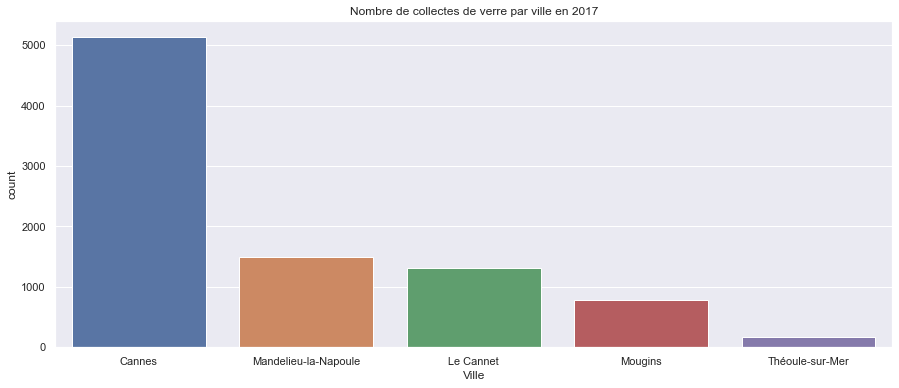

In [33]:
sns.set(style="darkgrid")
plt.figure(figsize= [15, 6])
data17 = data171819[data171819["Année"] == 2017]
plt.title("Nombre de collectes de verre par ville en 2017")
sns.countplot(x="Ville", data=data17, order=data17["Ville"].value_counts().keys())

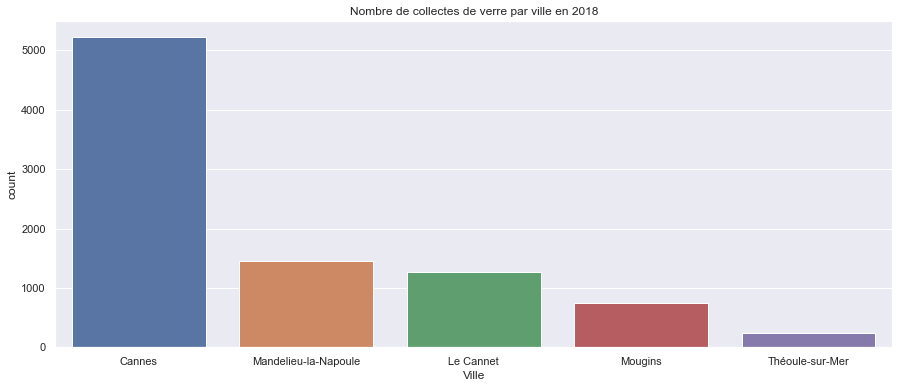

In [34]:
plt.figure(figsize= [15, 6])
data18 = data171819[data171819["Année"] == 2018]
plt.title("Nombre de collectes de verre par ville en 2018")
sns.countplot(x="Ville", data=data18, order=data18["Ville"].value_counts().keys())

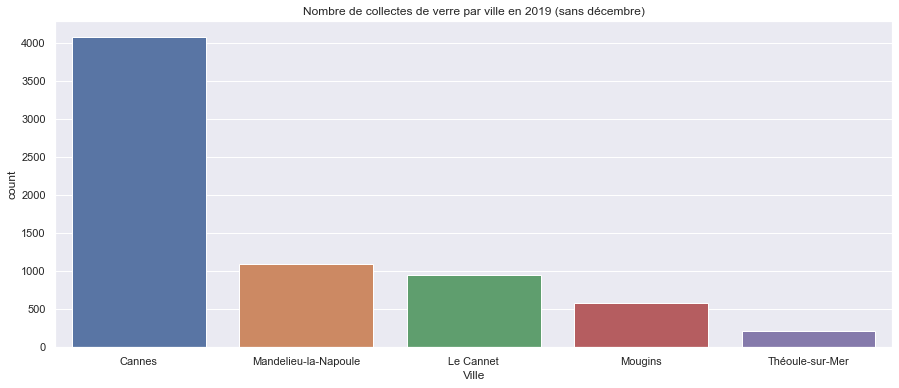

In [35]:
plt.figure(figsize= [15, 6])
data19 = data171819[data171819["Année"] == 2019]
plt.title("Nombre de collectes de verre par ville en 2019 (sans décembre)")
sns.countplot(x="Ville", data=data19, order=data19["Ville"].value_counts().keys())

In [36]:
data171819

,Collecte,Contenant,Adresse,Ville,Année,MOIS,SEMAINE,date,heure,Taux,Poids Kg
0,PAV,CNT135V,CHEMIN DES BREGUIERES,Le Cannet,2017,Janvier,1,2017-01-05,06:32:09,2,500
1,PAV,CNT005V,RUE DES MOULIERES,Le Cannet,2017,Janvier,1,2017-01-05,06:38:41,2,420
2,PAV,CNT165V,AVENUE DU REPOS,Le Cannet,2017,Janvier,1,2017-01-05,06:44:56,1,210
3,PAV,CNT115V,RUE DES ORANGERS,Le Cannet,2017,Janvier,1,2017-01-05,06:48:51,2,450
4,PAV,CNT150V,BOULEVARD D'OLIVETUM,Le Cannet,2017,Janvier,1,2017-01-05,06:54:58,3,730
...,...,...,...,...,...,...,...,...,...,...,...
24755,PAV,CAN013V,ALLEE DE LA LIBERTE,Cannes,2019,Novembre,47,2019-11-22,09:04:01,1,250
24756,PAV,CAN017V,AVENUE LAUGIER,Cannes,2019,Novembre,47,2019-11-22,09:10:11,2,450
24757,PAV,CAN152V,AVENUE ISOLA BELLA,Cannes,2019,Novembre,47,2019-11-22,07:10:00,4,970
24758,PAV,CAN159V,55 AVENUE DU ROI ALBERT 1ER,Cannes,2019,Novembre,47,2019-11-22,08:13:47,1,230


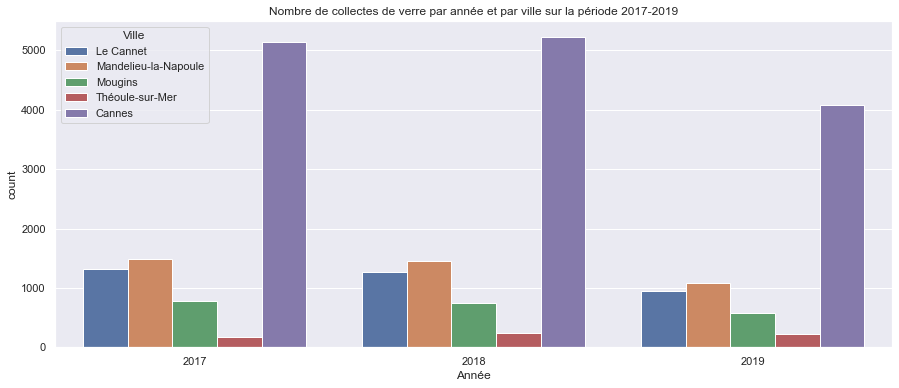

In [37]:
plt.figure(figsize= [15, 6])
plt.title("Nombre de collectes de verre par année et par ville sur la période 2017-2019")
sns.countplot(x="Année", hue="Ville", data=data171819)

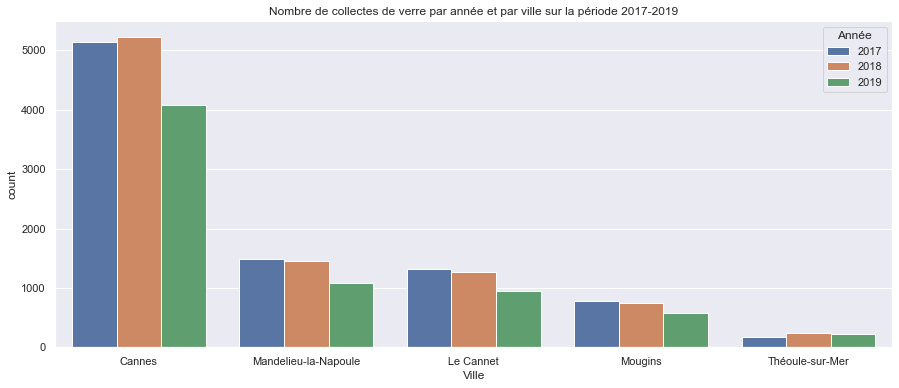

In [38]:
plt.figure(figsize= [15, 6])
plt.title("Nombre de collectes de verre par année et par ville sur la période 2017-2019")
sns.countplot(x="Ville", hue="Année", data=data171819, order=data171819['Ville'].value_counts().keys())

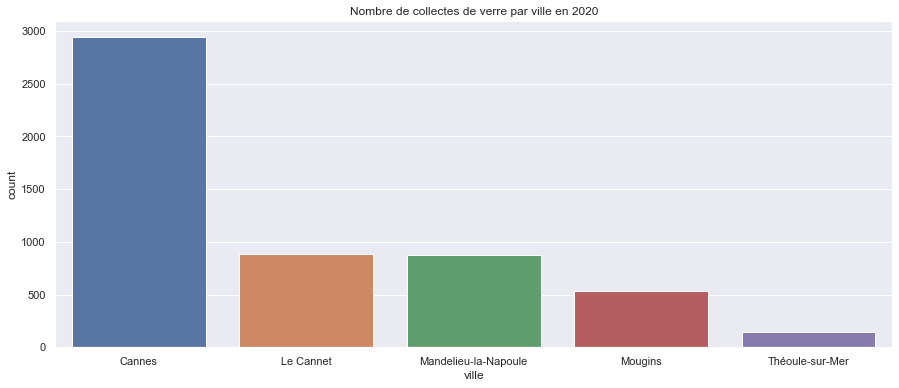

In [39]:
plt.figure(figsize= [15, 6])
plt.title("Nombre de collectes de verre par ville en 2020")
sns.countplot(x="ville", data=data20, order=data20["ville"].value_counts().keys())

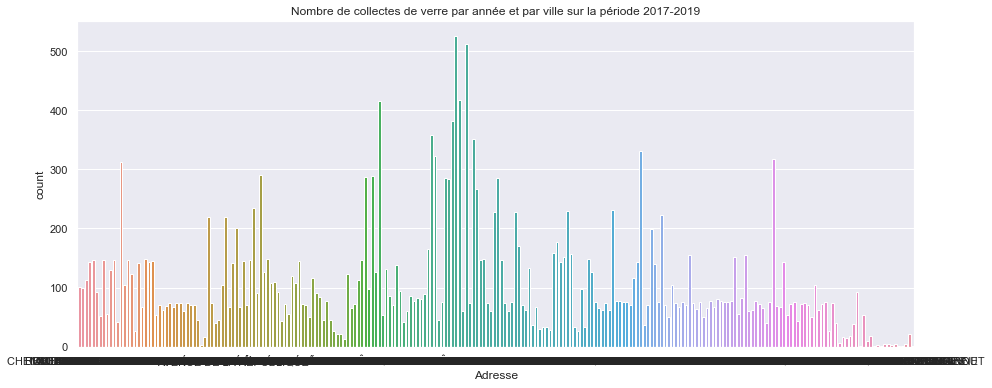

In [41]:
plt.figure(figsize= [15, 6])
plt.title("Nombre de collectes de verre par année et par ville sur la période 2017-2019")
sns.countplot(x="Adresse", data=data171819)